# EQUITY FIXED LOOKBACK

Valuation and Risk of Equity Fixed Lookback Options

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from financepy.utils import *
from financepy.market.curves.discount_curve_flat import DiscountCurveFlat
from financepy.products.equity.equity_fixed_lookback_option import EquityFixedLookbackOption
from financepy.models.black_scholes import BlackScholes

# Fixed Lookback Option

I create a fixed lookback call and put option

In [2]:
expiry_date = Date(1, 1, 2021)

In [3]:
strike_price = 105.0

In [4]:
option_typeCall = OptionTypes.EUROPEAN_CALL
option_typePut = OptionTypes.EUROPEAN_PUT

In [5]:
lookbackCall = EquityFixedLookbackOption(expiry_date, option_typeCall, strike_price)
lookbackPut = EquityFixedLookbackOption(expiry_date, option_typePut, strike_price)

In [6]:
print(lookbackCall)

OBJECT TYPE: EquityFixedLookbackOption
EXPIRY DATE: 01-JAN-2021
STRIKE PRICE: 105.0
OPTION TYPE: OptionTypes.EUROPEAN_CALL


In [7]:
print(lookbackPut)

OBJECT TYPE: EquityFixedLookbackOption
EXPIRY DATE: 01-JAN-2021
STRIKE PRICE: 105.0
OPTION TYPE: OptionTypes.EUROPEAN_PUT


## Valuation

In [8]:
valuation_date = Date(1, 1, 2020)

In [9]:
interest_rate = 0.10

In [10]:
discount_curve = DiscountCurveFlat(valuation_date, interest_rate)

In [11]:
dividend_yield = 0.0

In [12]:
dividend_curve = DiscountCurveFlat(valuation_date, dividend_yield)

In [13]:
volatility = 0.10

In [14]:
num_paths = 10000
num_steps_per_year = 1000

In [15]:
stock_prices = np.linspace(50, 150, 20)

In [19]:
values = []
valuesMC = []

for stock_price in stock_prices:
    stock_min_max = stock_price
    v = lookbackCall.value(valuation_date, stock_price, discount_curve, dividend_curve,
                           volatility, stock_min_max)
    v_mc = lookbackCall.value_mc(valuation_date, stock_price, discount_curve, dividend_curve, 
                                volatility, stock_min_max, num_paths, num_steps_per_year)
    values.append(v)
    valuesMC.append(v_mc)

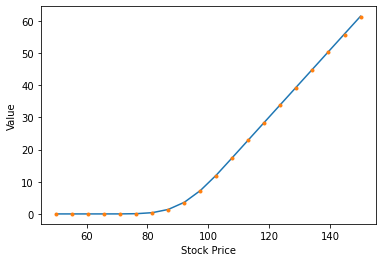

In [20]:
plt.plot(stock_prices, values)
plt.plot(stock_prices, valuesMC, '.')
plt.xlabel("Stock Price")
plt.ylabel("Value");

In [21]:
values = []
valuesMC = []

for stock_price in stock_prices:
    stock_min_max = stock_price
    v = lookbackPut.value(valuation_date, stock_price, discount_curve, dividend_curve,
                           volatility, stock_min_max)
    v_mc = lookbackPut.value_mc(valuation_date, stock_price, discount_curve, dividend_curve, 
                                volatility, stock_min_max, num_paths, num_steps_per_year)
    values.append(v)
    valuesMC.append(v_mc)

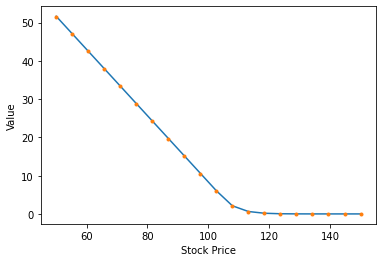

In [22]:
plt.plot(stock_prices, values)
plt.plot(stock_prices, valuesMC, '.')
plt.xlabel("Stock Price")
plt.ylabel("Value");

Copyright (c) 2020 Dominic O'Kane